## 1 词云

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud  # 生成词云
import jieba  # 分词
plt.rcParams['font.sans-serif'] = ['SimHei']  # Windows中使得图标的中文能够正常显示
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 处理comment文本
comment_df = pd.read_excel("评论汇总.xlsx").fillna("")
# 将数据列转换成一个字符串
comment_corpus = " ".join(comment_df['评论文本'])
# 用jieba对文本进行分词
comment_cut = jieba.lcut(comment_corpus)
# 去停用词
## 如果不去停用词，去掉像“的”、“你”、“我”之类的“无意义”词
stopwords = []
with open("stop_words.txt", encoding='utf8') as f:
    # strip()的作用是修理掉'\n', ' '之类的词
    stopwords = list(map(lambda w: w.strip(), f.readlines()))
assert(len(stopwords) > 0)
# 过滤掉弹幕分词结果中的停用词
comment_txt = " ".join(filter(lambda w: w not in stopwords, comment_cut))

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\zj_ta\AppData\Local\Temp\jieba.cache
Loading model cost 1.296 seconds.
Prefix dict has been built successfully.


In [38]:
count = {}
for word in comment_cut:
    if len(word) == 1:
        continue
    else:
        count[word] = count.get(word, 0) + 1
lists = list(count.items())
lists.sort(key=lambda x: x[1], reverse=True) 



In [39]:
lists

[('同性恋', 1674),
 ('自己', 1492),
 ('喜欢', 1446),
 ('一个', 1337),
 ('觉得', 935),
 ('没有', 901),
 ('但是', 888),
 ('就是', 806),
 ('真的', 798),
 ('不是', 740),
 ('他们', 730),
 ('父母', 709),
 ('这个', 680),
 ('up', 678),
 ('接受', 660),
 ('知道', 640),
 ('什么', 637),
 ('女生', 637),
 ('现在', 633),
 ('还是', 616),
 ('可以', 603),
 ('我妈', 577),
 ('结婚', 572),
 ('因为', 569),
 ('感觉', 532),
 ('我们', 519),
 ('妈妈', 506),
 ('如果', 490),
 ('支持', 464),
 ('出柜', 462),
 ('孩子', 457),
 ('时候', 449),
 ('希望', 449),
 ('男生', 448),
 ('可能', 426),
 ('同性', 421),
 ('幸福', 397),
 ('别人', 391),
 ('不会', 390),
 ('这样', 382),
 ('所以', 368),
 ('异性恋', 363),
 ('这种', 353),
 ('怎么', 350),
 ('朋友', 349),
 ('一起', 335),
 ('然后', 327),
 ('你们', 322),
 ('一样', 317),
 ('不能', 312),
 ('不要', 311),
 ('理解', 308),
 ('女孩子', 306),
 ('以后', 305),
 ('应该', 305),
 ('歧视', 294),
 ('只是', 293),
 ('社会', 293),
 ('其实', 292),
 ('已经', 290),
 ('很多', 288),
 ('问题', 286),
 ('不想', 269),
 ('一直', 259),
 ('反对', 244),
 ('正常', 239),
 ('性别', 238),
 ('异性', 232),
 ('事情', 228),
 ('这么', 226),
 ('后来', 226),

In [46]:
with open("cipin.xlsx", 'w', encoding='gbk') as f:
    for i in range(100):
        word, number = lists[i]
        f.write('{}\t{}\n'.format(word, number))
    f.close()


In [19]:
comment_df

,用户ID,评论时间,评论文本
0,酒梦入桃枝,2022-08-04 11:39,置顶我怎么感觉看过这个视频
1,神原千鶴,2022-08-19 23:11,我可能和大家不太一样，我首先和我妈说了我们年级第一(男)有男朋友的事情，看看她对这件事的接受...
2,c加加你把我埋了吧,2022-08-20 18:05,我父母是那种很传统的人，我平时衣服如果穿得偏向中性风都会被说教，更别提单身主义这种思想。\n...
3,Lyyyyyyyyy_t,2022-08-20 17:20,我表哥当时和我大姨说并且介绍自己男朋友给我大姨的时候，我估计全家除了我们几个小辈和几个年纪不...
4,斜昨夜,2022-08-09 06:45,其实阿爸从你的问题中或多或少猜出来了，但能有耐心听完，真的不错了
...,...,...,...
5620,绯羽思念,2019-11-12 12:02,回复 @FLSD222 :你要明白人伦这个词
5621,1074580723,2019-11-11 18:17,宣传是为了让更多的人正视我们，不在歧视，侮辱，甚至进行人身攻击
5622,霹雳乓啷轰,2019-11-14 18:46,回复 @妖娆灵凌 :其实很多老一代不接受不是最可怕的，最可怕的是年轻人新一代还不能接受，还在...
5623,为什么你是雷属性,2019-11-11 23:07,世界是不可能都是同性恋的。


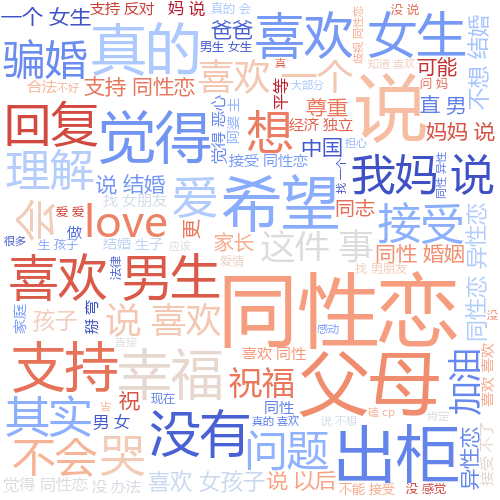

In [18]:
# 生成词云
# 解决无法正常显示中文的BUG
# font_path = "/System/Library/fonts/PingFang.ttc"  # Mac
# font_path = "C:\\Windows\\Fonts\\msyh.ttf"  # Windows1
font_path = "C:/Windows/Fonts/msyh.ttc" # Windows2

word_cloud = WordCloud(background_color="white",
                       font_path=font_path,
                      width = 500,
                      height = 500,
                      max_words = 100,
                      max_font_size = 80,
                      contour_width = 3,
                      colormap = 'coolwarm'
                      )
# 展示生成的词云图
word_cloud.generate(comment_txt)
word_cloud.to_image()
# word_cloud.to_file("D:\大四上\sjsw\comment_cloud.png")

## 2 情感分析

In [16]:
# 调用阿里云情感分析开放API
import json
import time
from aliyunsdkalinlp.request.v20200629 import GetSaChGeneralRequest
from aliyunsdkcore.client import AcsClient
from aliyunsdkcore.acs_exception.exceptions import ClientException
from aliyunsdkcore.acs_exception.exceptions import ServerException
from tqdm import tqdm


# API申请，accessKey和accessSecret的获取方法：
# https://help.aliyun.com/document_detail/176652.html
accessKey = "LTAI5tA13Z3DxTZCHLe6X3tF"
accessSecret = "I6iNxHUVd6JmcvHkfesPc7jTrEgkzV"
# 创建AcsClient实例
client = AcsClient(
    accessKey,
    accessSecret,
    "cn-hangzhou"
)

sentiments = []
comment_df_new = comment_df[comment_df['评论文本'] != '']
for comment in tqdm(comment_df_new['评论文本'].dropna()):
    request = GetSaChGeneralRequest.GetSaChGeneralRequest()
    request.set_ServiceCode("alinlp")
    request.set_Text(comment)
    response = client.do_action_with_exception(request)
    resp_obj = json.loads(response)

    res = json.loads(resp_obj['Data'])['result']
    # 由于阿里云限制每秒只能访问20次，所以每次调用API后休眠0.05s
    time.sleep(0.05)
    sentiments.append(res)

100%|██████████████████████████████████████████████████████████████████████████████| 5604/5604 [10:56<00:00,  8.54it/s]


In [20]:
# 将情感分析结果merge到comment_df
senti_df = pd.DataFrame(sentiments)
comment_df = pd.concat([comment_df, senti_df], axis=1)
# 存储相应结果
comment_df.to_csv("评论_情感分析.csv")
comment_df = pd.read_csv("评论_情感分析.csv")
comment_df.head()


,Unnamed: 0,用户ID,评论时间,评论文本,positive_prob,sentiment,neutral_prob,negative_prob
0,0,酒梦入桃枝,2022-08-04 11:39,置顶我怎么感觉看过这个视频,0.9945,正面,0.0001,0.0054
1,1,神原千鶴,2022-08-19 23:11,我可能和大家不太一样，我首先和我妈说了我们年级第一(男)有男朋友的事情，看看她对这件事的接受...,0.9262,正面,0.0004,0.0734
2,2,c加加你把我埋了吧,2022-08-20 18:05,我父母是那种很传统的人，我平时衣服如果穿得偏向中性风都会被说教，更别提单身主义这种思想。\n...,0.9557,正面,0.0002,0.0441
3,3,Lyyyyyyyyy_t,2022-08-20 17:20,我表哥当时和我大姨说并且介绍自己男朋友给我大姨的时候，我估计全家除了我们几个小辈和几个年纪不...,0.9843,正面,0.0006,0.0150
4,4,斜昨夜,2022-08-09 06:45,其实阿爸从你的问题中或多或少猜出来了，但能有耐心听完，真的不错了,0.9720,正面,0.0033,0.0247


In [21]:
comment_df = pd.read_csv("评论_情感分析.csv")
comment_df.head()

,Unnamed: 0,用户ID,评论时间,评论文本,positive_prob,sentiment,neutral_prob,negative_prob
0,0,酒梦入桃枝,2022-08-04 11:39,置顶我怎么感觉看过这个视频,0.9945,正面,0.0001,0.0054
1,1,神原千鶴,2022-08-19 23:11,我可能和大家不太一样，我首先和我妈说了我们年级第一(男)有男朋友的事情，看看她对这件事的接受...,0.9262,正面,0.0004,0.0734
2,2,c加加你把我埋了吧,2022-08-20 18:05,我父母是那种很传统的人，我平时衣服如果穿得偏向中性风都会被说教，更别提单身主义这种思想。\n...,0.9557,正面,0.0002,0.0441
3,3,Lyyyyyyyyy_t,2022-08-20 17:20,我表哥当时和我大姨说并且介绍自己男朋友给我大姨的时候，我估计全家除了我们几个小辈和几个年纪不...,0.9843,正面,0.0006,0.0150
4,4,斜昨夜,2022-08-09 06:45,其实阿爸从你的问题中或多或少猜出来了，但能有耐心听完，真的不错了,0.9720,正面,0.0033,0.0247


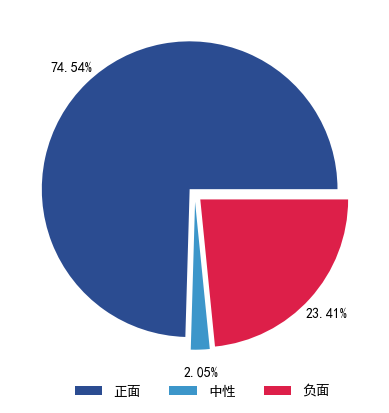

In [28]:
# 统计情感分析的结果
positive_num = len(comment_df[comment_df['sentiment']=='正面'])
neutral_num = len(comment_df[comment_df['sentiment']=='中性'])
negative_num = len(comment_df[comment_df['sentiment']=='负面'])

data = [positive_num, neutral_num, negative_num]
label = ["正面", "中性", "负面"]
color = ['#2b4c91', '#3c96ca', '#dd1f49']
explode = (0.05, 0.05, 0.05) 
plt.pie(data, autopct='%.2f%%', colors = color, explode = explode, pctdistance = 1.15)
plt.legend(label, ncol = 3, bbox_to_anchor=(0.9, 0.02), frameon = False)
plt.savefig(r"D:\大四上\sjsw\feeling.png")
plt.show()


In [47]:
comment_df['评论文本']

0                                           置顶我怎么感觉看过这个视频
1       我可能和大家不太一样，我首先和我妈说了我们年级第一(男)有男朋友的事情，看看她对这件事的接受...
2       我父母是那种很传统的人，我平时衣服如果穿得偏向中性风都会被说教，更别提单身主义这种思想。\n...
3       我表哥当时和我大姨说并且介绍自己男朋友给我大姨的时候，我估计全家除了我们几个小辈和几个年纪不...
4                        其实阿爸从你的问题中或多或少猜出来了，但能有耐心听完，真的不错了
                              ...                        
5620                               回复 @FLSD222 :你要明白人伦这个词
5621                      宣传是为了让更多的人正视我们，不在歧视，侮辱，甚至进行人身攻击
5622    回复 @妖娆灵凌 :其实很多老一代不接受不是最可怕的，最可怕的是年轻人新一代还不能接受，还在...
5623                                        世界是不可能都是同性恋的。
5624                                     我是男同，我没有艾滋没有梅毒谢谢
Name: 评论文本, Length: 5625, dtype: object

## 3 词频统计

In [50]:
## 评论关注点
keywords = {
    '父亲': ['爹','父','爸', '老汉', '老子', '大大'],
    '母亲': ['娘','母', '妈'],
    '子女': ['儿', '女', '孩子', '小孩', '孩儿'],
    '其他': ['同学', '认识的人', '友', '同事', '同僚', '老乡']
}

In [51]:
comment_df = pd.read_excel("评论汇总.xlsx").fillna("")
comment_df['id'] = ["no."+str(i) for i in range(0, 5625)]
comment_df

,用户ID,评论时间,评论文本,id
0,酒梦入桃枝,2022-08-04 11:39,置顶我怎么感觉看过这个视频,no.0
1,神原千鶴,2022-08-19 23:11,我可能和大家不太一样，我首先和我妈说了我们年级第一(男)有男朋友的事情，看看她对这件事的接受...,no.1
2,c加加你把我埋了吧,2022-08-20 18:05,我父母是那种很传统的人，我平时衣服如果穿得偏向中性风都会被说教，更别提单身主义这种思想。\n...,no.2
3,Lyyyyyyyyy_t,2022-08-20 17:20,我表哥当时和我大姨说并且介绍自己男朋友给我大姨的时候，我估计全家除了我们几个小辈和几个年纪不...,no.3
4,斜昨夜,2022-08-09 06:45,其实阿爸从你的问题中或多或少猜出来了，但能有耐心听完，真的不错了,no.4
...,...,...,...,...
5620,绯羽思念,2019-11-12 12:02,回复 @FLSD222 :你要明白人伦这个词,no.5620
5621,1074580723,2019-11-11 18:17,宣传是为了让更多的人正视我们，不在歧视，侮辱，甚至进行人身攻击,no.5621
5622,霹雳乓啷轰,2019-11-14 18:46,回复 @妖娆灵凌 :其实很多老一代不接受不是最可怕的，最可怕的是年轻人新一代还不能接受，还在...,no.5622
5623,为什么你是雷属性,2019-11-11 23:07,世界是不可能都是同性恋的。,no.5623


In [52]:
comment_cpy = comment_df.copy()
# 获取keywords列表
keywords2 = list(keywords)
# 构建'uid'->{'brand1': cnt_1, ···, 'brandN': cnt_N}dict
key_base_dict = dict(map(lambda b: (b, 0), keywords2))
idkeyword = dict(map(lambda x: (x, key_base_dict.copy()), 
                                 set(comment_df['id'])))
# 对idkeyword进行更新
def update_idkeyword(group):
    uid = list(group['id'])[0]
#     print(uid) # 测试用
    for sentence in group['评论文本']:
#         print(sentence) # 测试用
        for key, value in keywords.items():
#             print(key) # 测试用
#             print(value) # 测试用
            for item in value:
                idkeyword[uid][key]+= item in sentence
            

        
(
    comment_cpy
    .groupby('id')
    .apply(update_idkeyword)
)
user_df = pd.DataFrame().from_dict(idkeyword).T
user_df.to_csv("评论关注点.csv")
user_df

,父亲,母亲,子女,其他
no.595,0,0,0,0
no.404,0,0,0,0
no.2466,0,1,0,0
no.1683,0,0,1,0
no.3506,0,0,0,0
...,...,...,...,...
no.3843,1,1,0,0
no.2846,0,0,1,0
no.501,1,1,1,0
no.661,0,0,0,0


In [53]:
data = pd.DataFrame(user_df.sum())
data

,0
父亲,990
母亲,1504
子女,1972
其他,668


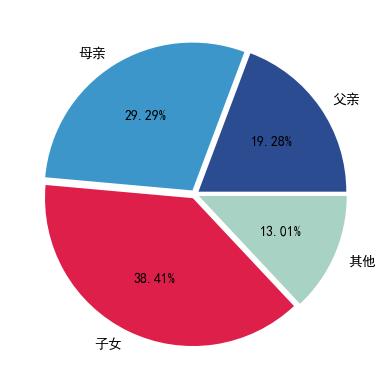

In [62]:
data = [990, 1504, 1972, 668]
label = ["父亲", "母亲", "子女", '其他']
explode = (0.03, 0.03, 0.03, 0.03) 
plt.pie(data, labels=label, autopct='%.2f%%', explode = explode, colors =  ['#2b4c91', '#3c96ca', '#dd1f49','#a8d2c4'])
plt.savefig(r"D:\大四上\sjsw\feature.png")
plt.show()

## 4 共现文本网络分析：输出节点及边csv

In [65]:
import pandas as pd
import numpy as np
import os
import jieba 
from tqdm import tqdm

def my_cut(text): 
        
    # 加载停用词
    stop_words = [] 
    with open("stop_words.txt", 'r',encoding='utf8') as f:
        lines = f.readlines()
        for line in lines:
            stop_words.append(line.strip())
    # stop_words[:10]
           
    return [w for w in jieba.cut(text) if w not in stop_words and len(w)>1]


def str2csv(filePath, s, x):
    '''
    将字符串写入到本地csv文件中
    :param filePath: csv文件路径
    :param s: 待写入字符串(逗号分隔格式)
    '''
    if x=='node':
        with open(filePath, 'w', encoding='gbk') as f:
            f.write("Label,Weight\r")
            f.write(s)
        print('写入文件成功,请在'+filePath+'中查看')
    else:
        with open(filePath, 'w', encoding='gbk') as f:
            f.write("Source,Target,Weight\r")
            f.write(s)
        print('写入文件成功,请在'+filePath+'中查看')



def sortDictValue(dict, is_reverse):
    '''
    将字典按照value排序
    :param dict: 待排序的字典
    :param is_reverse: 是否按照倒序排序
    :return s: 符合csv逗号分隔格式的字符串
    '''
    # 对字典的值进行倒序排序,items()将字典的每个键值对转化为一个元组,key输入的是函数,item[1]表示元组的第二个元素,reverse为真表示倒序
    tups = sorted(dict.items(), key=lambda item: item[1], reverse=is_reverse)
    s = ''
    for tup in tups:  # 合并成csv需要的逗号分隔格式
        s = s + tup[0] + ',' + str(tup[1]) + '\n'
    return s


def build_matrix(co_authors_list, is_reverse):
    '''
    根据共同列表,构建共现矩阵(存储到字典中),并将该字典按照权值排序
    :param co_authors_list: 共同列表
    :param is_reverse: 排序是否倒序
    :return node_str: 三元组形式的节点字符串(且符合csv逗号分隔格式)
    :return edge_str: 三元组形式的边字符串(且符合csv逗号分隔格式)
    '''
    node_dict = {}  # 节点字典,包含节点名+节点权值(频数)
    edge_dict = {}  # 边字典,包含起点+目标点+边权值(频数)
    # 第1层循环,遍历整表的每行信息
    for row_authors in co_authors_list:
        row_authors_list = row_authors.split(' ') # 依据','分割每行,存储到列表中
        # 第2层循环
        for index, pre_au in tqdm(enumerate(row_authors_list)): # 使用enumerate()以获取遍历次数index
            # 统计单个词出现的频次
            if pre_au not in node_dict:
                node_dict[pre_au] = 1
            else:
                node_dict[pre_au] += 1
            # 若遍历到倒数第一个元素,则无需记录关系,结束循环即可
            if pre_au == row_authors_list[-1]:
                break
            connect_list = row_authors_list[index+1:]
            # 第3层循环,遍历当前行词后面所有的词,以统计两两词出现的频次
            for next_au in connect_list:
                A, B = pre_au, next_au
                # 固定两两词的顺序
                # 仅计算上半个矩阵
                if A==B:
                    continue
                if A > B:
                    A, B = B, A
                key = A+','+B  # 格式化为逗号分隔A,B形式,作为字典的键
                # 若该关系不在字典中,则初始化为1,表示词间的共同出现次数
                if key not in edge_dict:
                    edge_dict[key] = 1
                else:
                    edge_dict[key] += 1
    # 对得到的字典按照value进行排序
    node_str = sortDictValue(node_dict, is_reverse)  # 节点
    edge_str = sortDictValue(edge_dict, is_reverse)   # 边
    return node_str, edge_str



filePath1 = 'node.csv'
filePath2 = 'edge.csv'
# 读取csv文件获取数据并存储到列表中
df = pd.read_excel('评论汇总.xlsx')
df_ = [w for w in df['评论文本'] ]
for i in df_:
    if(type(i) == float):
        df_.remove(i)
co_ist = [ " ".join(my_cut(w)) for w in df_ ] 

# 根据共同词列表, 构建共现矩阵(存储到字典中), 并将该字典按照权值排序
node_str, edge_str = build_matrix(co_ist, is_reverse=True)
#print(edge_str)
# 将字符串写入到本地csv文件中
str2csv(filePath1,node_str,'node')
str2csv(filePath2,edge_str,'edge')


3it [00:00, ?it/s]
28it [00:00, ?it/s]
106it [00:00, ?it/s]
39it [00:00, ?it/s]
7it [00:00, ?it/s]
83it [00:00, ?it/s]
8it [00:00, ?it/s]
18it [00:00, ?it/s]
10it [00:00, ?it/s]
17it [00:00, ?it/s]
22it [00:00, ?it/s]
16it [00:00, ?it/s]
20it [00:00, ?it/s]
4it [00:00, ?it/s]
1it [00:00, 344.22it/s]
2it [00:00, ?it/s]
30it [00:00, 179499.46it/s]
167it [00:00, 40930.80it/s]
2it [00:00, ?it/s]
8it [00:00, ?it/s]
15it [00:00, ?it/s]
13it [00:00, ?it/s]
12it [00:00, ?it/s]
6it [00:00, ?it/s]
9it [00:00, ?it/s]
11it [00:00, ?it/s]
13it [00:00, ?it/s]
6it [00:00, ?it/s]
3it [00:00, ?it/s]
1it [00:00, ?it/s]
7it [00:00, ?it/s]
13it [00:00, ?it/s]
3it [00:00, ?it/s]
3it [00:00, ?it/s]
7it [00:00, ?it/s]
14it [00:00, ?it/s]
14it [00:00, ?it/s]
9it [00:00, 18122.29it/s]
15it [00:00, ?it/s]
2it [00:00, ?it/s]
1it [00:00, ?it/s]
5it [00:00, ?it/s]
31it [00:00, ?it/s]
6it [00:00, ?it/s]
22it [00:00, ?it/s]
5it [00:00, ?it/s]
5it [00:00, ?it/s]
10it [00:00, ?it/s]
6it [00:00, ?it/s]
2it [00:00, ?it/

0it [00:00, ?it/s]
2it [00:00, ?it/s]
3it [00:00, ?it/s]
25it [00:00, ?it/s]
10it [00:00, ?it/s]
5it [00:00, ?it/s]
9it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
93it [00:00, ?it/s]
0it [00:00, ?it/s]
6it [00:00, ?it/s]
25it [00:00, ?it/s]
4it [00:00, ?it/s]
1it [00:00, ?it/s]
5it [00:00, ?it/s]
2it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
1it [00:00, ?it/s]
49it [00:00, ?it/s]
0it [00:00, ?it/s]
1it [00:00, ?it/s]
5it [00:00, ?it/s]
1it [00:00, ?it/s]
0it [00:00, ?it/s]
2it [00:00, ?it/s]
3it [00:00, ?it/s]
2it [00:00, ?it/s]
2it [00:00, ?it/s]
1it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
8it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
1it [00:00, ?it/s]
1it [00:00, ?it/s]
3it [00:00, ?it/s]
0it [00:00, ?it/s]
7it [00:00, ?it/s]
5it [00:00, ?it/s]
7it [00:00, ?it/s]
0it [00:00, ?it/s]
2it [00:00, ?it/s]
0it [00:00, ?it/s]
6it [00:00, ?it/s]
3it [00:00, ?it/s]
0it [00:00, ?it/s]
8it [00:00, ?it/s]
1it [00:00, ?it/s]
2it [00:00, ?it/s]
0it [00

13it [00:00, ?it/s]
62it [00:00, 7587.51it/s]
16it [00:00, ?it/s]
30it [00:00, ?it/s]
8it [00:00, ?it/s]
5it [00:00, ?it/s]
5it [00:00, ?it/s]
3it [00:00, ?it/s]
20it [00:00, ?it/s]
14it [00:00, ?it/s]
26it [00:00, 75468.45it/s]
4it [00:00, ?it/s]
8it [00:00, ?it/s]
8it [00:00, 926.23it/s]
9it [00:00, ?it/s]
21it [00:00, ?it/s]
2it [00:00, ?it/s]
14it [00:00, ?it/s]
24it [00:00, ?it/s]
6it [00:00, 32768.00it/s]
85it [00:00, ?it/s]
11it [00:00, ?it/s]
0it [00:00, ?it/s]
32it [00:00, ?it/s]
12it [00:00, 65281.00it/s]
66it [00:00, ?it/s]
3it [00:00, ?it/s]
19it [00:00, ?it/s]
18it [00:00, 56007.03it/s]
5it [00:00, ?it/s]
4it [00:00, ?it/s]
1it [00:00, ?it/s]
5it [00:00, ?it/s]
14it [00:00, ?it/s]
4it [00:00, ?it/s]
9it [00:00, ?it/s]
32it [00:00, ?it/s]
0it [00:00, ?it/s]
33it [00:00, 57623.66it/s]
1it [00:00, ?it/s]
0it [00:00, ?it/s]
58it [00:00, ?it/s]
37it [00:00, ?it/s]
0it [00:00, ?it/s]
8it [00:00, ?it/s]
3it [00:00, ?it/s]
0it [00:00, ?it/s]
3it [00:00, ?it/s]
17it [00:00, ?it/s]


2it [00:00, ?it/s]
1it [00:00, ?it/s]
1it [00:00, ?it/s]
0it [00:00, ?it/s]
7it [00:00, ?it/s]
0it [00:00, ?it/s]
5it [00:00, ?it/s]
2it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
26it [00:00, ?it/s]
4it [00:00, ?it/s]
8it [00:00, ?it/s]
0it [00:00, ?it/s]
1it [00:00, ?it/s]
4it [00:00, ?it/s]
2it [00:00, ?it/s]
0it [00:00, ?it/s]
6it [00:00, ?it/s]
1it [00:00, ?it/s]
0it [00:00, ?it/s]
3it [00:00, ?it/s]
2it [00:00, ?it/s]
0it [00:00, ?it/s]
6it [00:00, ?it/s]
2it [00:00, ?it/s]
0it [00:00, ?it/s]
5it [00:00, ?it/s]
0it [00:00, ?it/s]
2it [00:00, ?it/s]
4it [00:00, ?it/s]
1it [00:00, ?it/s]
4it [00:00, ?it/s]
15it [00:00, ?it/s]
28it [00:00, ?it/s]
6it [00:00, ?it/s]
18it [00:00, ?it/s]
16it [00:00, ?it/s]
5it [00:00, ?it/s]
3it [00:00, ?it/s]
0it [00:00, ?it/s]
3it [00:00, ?it/s]
1it [00:00, ?it/s]
17it [00:00, ?it/s]
0it [00:00, ?it/s]
6it [00:00, ?it/s]
5it [00:00, 1693.30it/s]
0it [00:00, ?it/s]
1it [00:00, ?it/s]
6it [00:00, ?it/s]
4it [00:00, ?it/s]
23it [00:00, ?it/s]

写入文件成功,请在node.csv中查看
写入文件成功,请在edge.csv中查看


In [30]:
edge_str = pd.read_csv('edge.csv',encoding='gbk')
edge_str.shape

edge_str1 = edge_str[edge_str['Weight']>3]
edge_str1.shape

Source = edge_str1['Source'].tolist()
Target = edge_str1['Target'].tolist()
co = Source + Target
co =list(set(co))

node_str = pd.read_csv('node.csv',encoding='gbk')
#node_str

node_str=node_str[node_str['Label'].isin(co)]
node_str['id']=node_str['Label']
node_str = node_str[['id','Label','Weight']] # 调整列顺序
#node_str

node_str.to_csv(path_or_buf="node.txt", index=False) # 写入csv文件
edge_str1.to_csv(path_or_buf="edge.txt", index=False) # 写入csv文件
